<a href="https://colab.research.google.com/github/Chi68P1/AI/blob/main/Ai_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.fashion_mnist import load_data #dấu chấm là đường dẫn

(train_X, train_Y), (test_X, test_Y) = load_data()

In [ ]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'So: 8')

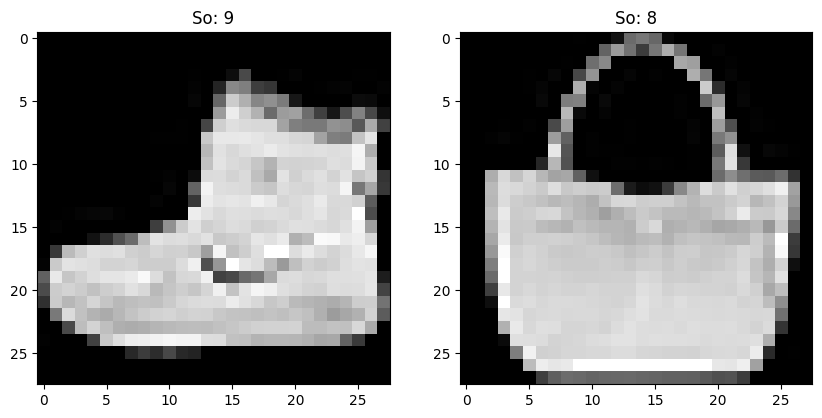

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = [10,10])
plt.subplot(121)
plt.imshow(train_X[0],cmap ='gray')
plt.title('So: {}'.format(train_Y[0]))
plt.subplot(122)
plt.imshow(train_X[100],cmap ='gray')
plt.title('So: {}'.format(train_Y[100]))

In [ ]:
train_X = train_X.reshape(60000,28,28,1)
test_X = test_X.reshape(10000,28,28,1)
print(train_X.shape)
print(test_X.shape)

train_X = train_X.astype('float32')
train_X = train_X/255
test_X = test_X.astype('float32')
test_X = test_X/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input

from keras.optimizers import Adam
batch_size = 64 
epochs = 24 
classes = 10

In [ ]:
#CNN
from keras.layers import LeakyReLU

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation= 'linear',input_shape = (28,28,1),padding = 'same'))
model.add(LeakyReLU(alpha =0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation='linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation='linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.summary()

In [ ]:
#ANN
from keras import losses

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha =0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss = losses.categorical_crossentropy,optimizer=Adam(),metrics = ['accuracy'])
model.summary()
train = model.fit(train_X,train_Y,batch_size=batch_size,epochs=epochs,verbose=1)

In [ ]:
test_acc,test_loss = model.evaluate(test_X, test_Y)

print("test_acc",test_acc)
print("test_loss",test_loss)


313/313 [==============================] - 1s 3ms/step - loss: 0.5073 - accuracy: 0.9170
test_acc 0.5073152780532837
test_loss 0.9169999957084656


In [ ]:
#Lưu model lại
model.save('CNN.h5')


In [ ]:
#Tải model lưu lên drive
from google.colab import drive
drive.mount('/content/drive')
!cp CNN.h5 "/content/drive/My Drive/Colab Notebooks"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = "/content/drive/My Drive/NGUYEN_HUU_CHI_20146479"


In [ ]:
photos,labels = list(), list()


In [ ]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('chi'):
    output = 1.0
  if file.startswith('Bản sao của phong'):
    output = 2.0
photo = load_img(folder +"/"+ file, target_size = (40,40))
photo = img_to_array(photo)
photos.append(photo)
labels = asarray(labels)
save('chi_phong_photo.jpg',photos)
save('chi_phong_label.jpg',labels)



test losses 0.5073152780532837
test accuracy 0.9169999957084656


Text(0.5, 1.0, 'Traning and Testing Accuracy')

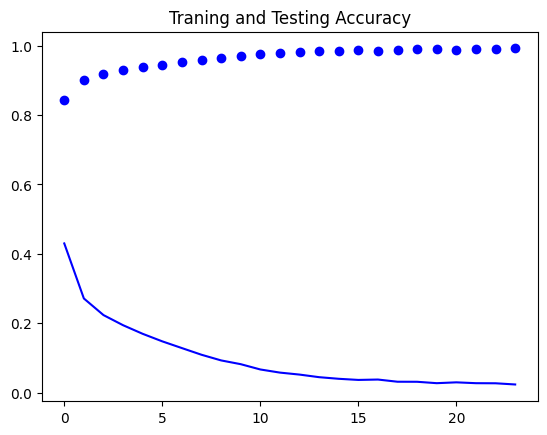

In [ ]:
eval = model.evaluate(test_X,test_Y,verbose=0)
print("test losses",eval[0])
print("test accuracy",eval[1])

accuracy = train.history['accuracy']
url_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label= 'Training Accuracy')
plt.plot(epochs,url_accuracy,'b',label = 'Testing Accuracy')
plt.title('Traning and Testing Accuracy')